**Name: Yiwei Wu\
Student number: 5023041**

# 1. Statements

## Classification
1.【False】To obtain a classiﬁer with a high classiﬁcation performance, you need to estimate the **class conditional probabilities well**.

2.【True】For a given dataset, the Bayes’ classiﬁer has the lowest classiﬁcation error.

3.【True】The linear discriminant analysis ldc is **scale insensitive**.

4.【True】A confusion matrix shows how **expensive it is to misclassify an object** from one class to another class.

5.【False】The logistic classiﬁer **minimizes the number of erroneously classiﬁed objects** of the training set.

6.【False】The decision boundary of a two-class classiﬁer is deﬁned as all points x for which holds: $p(\mathbf{x}|\omega_1) = p(\mathbf{x}|\omega_2)$.

7.【True】The Receiver Operating Characteristic Curve is **independent of class priors** in the test set.

8.【False】When the classes in a classiﬁcation problem have a Gaussian distribution, the optimal classiﬁer is the quadratic classiﬁer **qdc**.

9.【True】When k in the k-nearest neighbor classiﬁer is set to the number of training examples, k = n, the classiﬁer becomes **independent of class distributions**.

10.【True】Increasing the number of folds in crossvalidation reduces the variance in the error estimate.
## Clustering

1.【True】Hierarchical clustering **makes no assumptions about the underlying distribution of the data**.

2.【False】A hierarchical clustering result is **sensitive to its random initialization**.

3.【False】The **larger K** is in K-means clustering **the better the model** typically ﬁts to the training data.

4.【False】If single linkage clustering fails to work on a particular data set, complete linkage will work (and vice versa).

5.【True】To avoid local minima, the K-means algorithm should always be started with the K means centered on randomly selected objects.

## Feature Extraction and Selection
1.【False】Reducing the feature vector dimensionality by means of principle component analysis (PCA) will lead to **worse classiﬁcation performance** because it is an **unsupervised technique**.

2.【True】Extracting features can never lead to a decrease of the Bayes error.

3.【False】In feature selection, the number of diﬀerent feature sets of size 7 that one can select from 1,000 dimensions is larger than the number of diﬀerent feature sets of size 993 that one can select.

4.【False】PCA assumes that the underlying data distribution is **Gaussian**.

5.【True】Even by extracting more than 5 (linear or nonlinear) features from a 5-dimensional classiﬁcation problem, one **cannot reduce the Bayes error** of the original problem.

# 2. Classiﬁcation: probabilities
a. 2 objects are misclassified. They are object number 3 and number 4.

b. $\epsilon$ = $0.5*2/6 + 0.5*0$ = 0.167

c. $p(\omega_1)$ = $10/11*1$ = 0.909, $p(\omega_2)$ = $1/11*1$ = 0.091\
    Then object number 7 and object number 8 are misclassified.\
   $\epsilon$ = $p(\omega_1)*0$ + $p(\omega_2)*2/4$ = 0.046
   
d. No. The rejection of the most uncertain object will not improve the performance of the classifier. That's because the decision boundary is decided by the class conditional probabilities of each object instead of the certainty of the whole objects.

e. In this table, the conditional probabilities of class 2 are all zero, which indicates that the objects are rather different from those from true class. Therefore, the classifier may overfit on the training objects.

# 3. Classification: curves
#### a. The likelihood increases as h becomes larger. Although the higher likelihood results in better classifier, we also need to separate the two classifiers clearly. Therefore, h=0.8 is the optimum parameter for this training data.

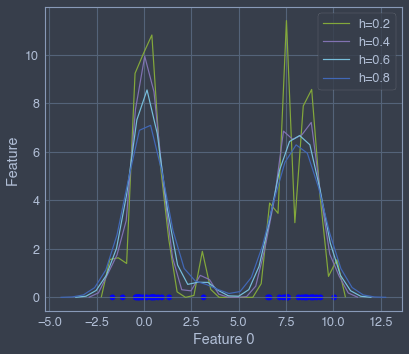

In [49]:
import numpy as np
import prtools as pr 
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme="onedork")
a = pr.gendats((20,20),1,8)
#deﬁne the width parameter h for the Parzen kernel
a = pr.prdataset(+a)
h1 = 0.2 
w1 = pr.parzenm(a,h1)
h2 = 0.4 
w2 = pr.parzenm(a,h2)
h3 = 0.6 
w3 = pr.parzenm(a,h3)
h4 = 0.8
w4 = pr.parzenm(a,h4)

pr.scatterd(a)
pr.plotm(w1)
pr.plotm(w2)
pr.plotm(w3)
pr.plotm(w4)
plt.legend(('h=0.2','h=0.4','h=0.6','h=0.8'))
plt.show()

#### b. The top line is the true error and the bottom line is the apparent error. 
##### Note:
The true error is higher than the apparent error. Both errors converge to an asymptotic error. The difference between true and apparent error is overfitting phenomenon.

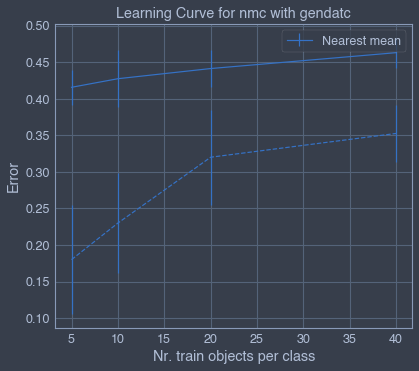

In [26]:
data = pr.gendatc(n=(1000,1000),dim=2, mu=0.0)
feature = +data 
label = pr.genlab(n=(1000,1000),lab=[-1,1])
noiseFeature = np.hstack((feature,np.random.rand(2000,60)))
noiseData = pr.prdataset(noiseFeature, label)
e_nmc = pr.cleval(noiseData, pr.nmc(), trainsize=[5, 10, 20, 40], nrreps=10) # default
plt.title("Learning Curve for nmc with gendatc")
plt.legend()

#### c. 
For QDC: the parameters to be estimated are the class prior, means and covariance matrices. So $N_{QDC} = 1+2d+d(d+1) = d^2+3d+1$\
For SVM: the parameters to be estimated is the $\alpha$. So $N_{SVM}=n$\
For Parzen: the parameters to be estimated is the width parameter h.

#### d.

In [31]:
data = pr.gendatc(n=(1000,1000),dim=2, mu=0.0)
feature = +data 
label = pr.genlab(n=(1000,1000),lab=[-1,1])
noiseFeature = np.hstack((feature,np.random.rand(2000,60)))
noiseData = pr.prdataset(noiseFeature, label)

Text(0.5, 1.0, 'Learning Curve')

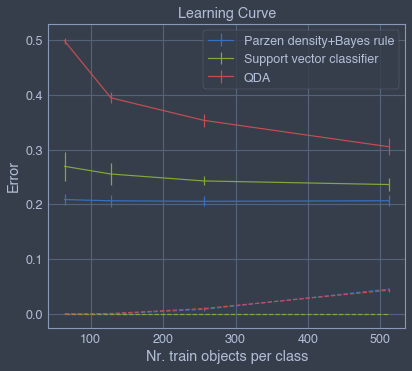

In [38]:
u = [pr.parzenc(), pr.svc(), pr.qdc()]
e_par = pr.cleval(noiseData, u[0], trainsize=[64, 128, 256, 512], nrreps=10) # default
e_svc = pr.cleval(noiseData, u[1], trainsize=[64, 128, 256, 512], nrreps=10)
e_qdc = pr.cleval(noiseData, u[2], trainsize=[64, 128, 256, 512], nrreps=10)
plt.legend()
plt.title("Learning Curve")

#### e.
majority voting (to be done)

# 4. Feature Extraction and Selection

#### a. [not done]

In [39]:
help (pr.fisherm)

Help on function fisherm in module prtools.prtools:

fisherm(task=None, x=None, w=None)
    Linear Discriminant Analysis
    
    W = fisherm(A, N)
    
    Performs linear discriminant analysis (LDA) on dataset A,
    keeping N < C dimensions, where C is the number of classes.
    
    Example:
    a = read_mat("cigars")
    w = fisherm(a, 1)
    b = a*w



In [57]:
a = np.array([[2,3], [5,7], [10,6]])
w = pr.fisherm(a,1)
b = a * w
print(b)

TypeError: unsupported operand type(s) for *: 'int' and 'prmapping'

#### b.
No. If all three classes overlap completely in 1D, they are identical in distribution, thus difficult for Fisher to decide the vector such that the classes are maximally separated.

# 5. Clustering

a.

The final clustering will be 2 clusters, one is on the lower left corner and the other is on the upper right corner.

b. 

There are one clustering consisting of two nonempty clusters.

c.

No. If two initial means are close to each other enough, the result might be one cluster.

d.

One method to measuring or testing the result is performing knn in several times and observing the cluster generation.